In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import utils
from keras import regularizers, optimizers

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
input_dim = X_train.shape[1]
encoding_dim = 32

autoencoder = Sequential()

#encoder
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))

#decoder
autoencoder.add(Dense(input_dim, activation='sigmoid'))

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.3590 - val_loss: 0.2704
Epoch 2/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2625 - val_loss: 0.2514
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2419 - val_loss: 0.2299
Epoch 4/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2217 - val_loss: 0.2113
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2062 - val_loss: 0.1988
Epoch 6/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1955 - val_loss: 0.1896
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1874 - val_loss: 0.1823
Epoch 8/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1807 - val_los

In [4]:
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

pca = PCA(n_components=1)
X_pca_train = pca.fit_transform(X_train_norm)
X_pca_test = pca.transform(X_test_norm)

X_pca_train = pca.inverse_transform(X_pca_train)
X_pca_train = norm.inverse_transform(X_pca_train)
X_pca_test = pca.inverse_transform(X_pca_test)
X_pca_test = norm.inverse_transform(X_pca_test)

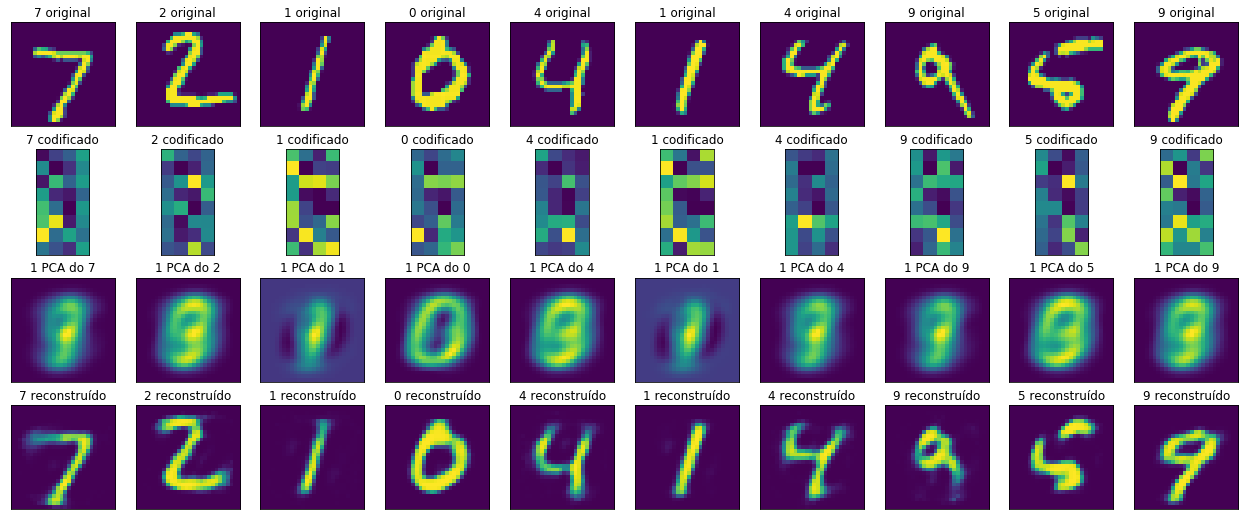

In [5]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

fig, ax = plt.subplots(4, 10, figsize=(22, 9))

for i in range(10):
    ax[0][i].imshow(X_test[i].reshape(28, 28))
    ax[0][i].set_title('%d original'%(y_test[i]))
    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)
    
    ax[1][i].imshow(encoded_imgs[i].reshape(8, 4))
    ax[1][i].set_title('%d codificado'%(y_test[i]))
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)
    
    ax[2][i].imshow(X_pca_test[i].reshape(28, 28))
    ax[2][i].set_title('1 PCA do %d'%(y_test[i]))
    ax[2][i].get_xaxis().set_visible(False)
    ax[2][i].get_yaxis().set_visible(False)

    ax[3][i].imshow(decoded_imgs[i].reshape(28, 28))
    ax[3][i].set_title('%d reconstruído'%(y_test[i]))
    ax[3][i].get_xaxis().set_visible(False)
    ax[3][i].get_yaxis().set_visible(False)

plt.savefig('results/mnist_plot_el1_dl1.pdf', dpi=100, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

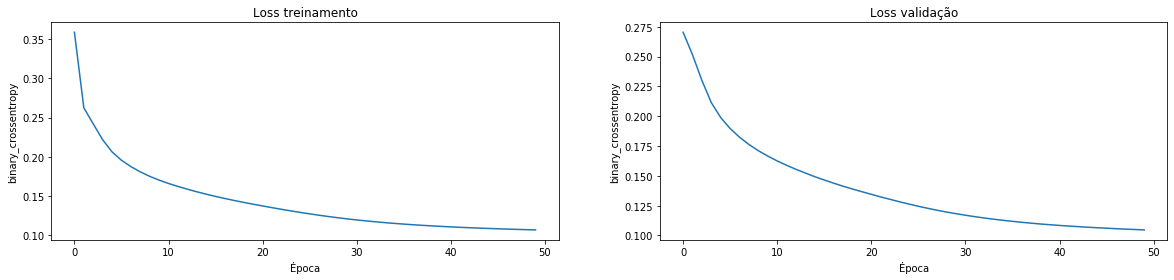

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
loss = history.history['loss']
val_loss = history.history['val_loss']

ax[0].plot(loss)
ax[0].set_ylabel('binary_crossentropy')
ax[0].set_xlabel('Época')
ax[0].set_title('Loss treinamento')

ax[1].set_title('Loss validação')
ax[1].plot(val_loss)
ax[1].set_ylabel('binary_crossentropy')
ax[1].set_xlabel('Época')

plt.savefig('results/mnist_loss_el1_dl1.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)

In [7]:
input_dim = X_train.shape[1]
encoding_dim = 32

autoencoder = Sequential()

#encoder
autoencoder.add(Dense(encoding_dim*2, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

#decoder
autoencoder.add(Dense(encoding_dim*2, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3309 - val_loss: 0.2657
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2582 - val_loss: 0.2470
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.2346 - val_loss: 0.2200
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2117 - val_loss: 0.1998
Epoch 5/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1929 - val_loss: 0.1849
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1814 - val_loss: 0.1758
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1743 - val_loss: 0.1693
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1688 - val_loss: 0.1652
Epoch 9/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1638 - val_loss: 0.1591
Epoch

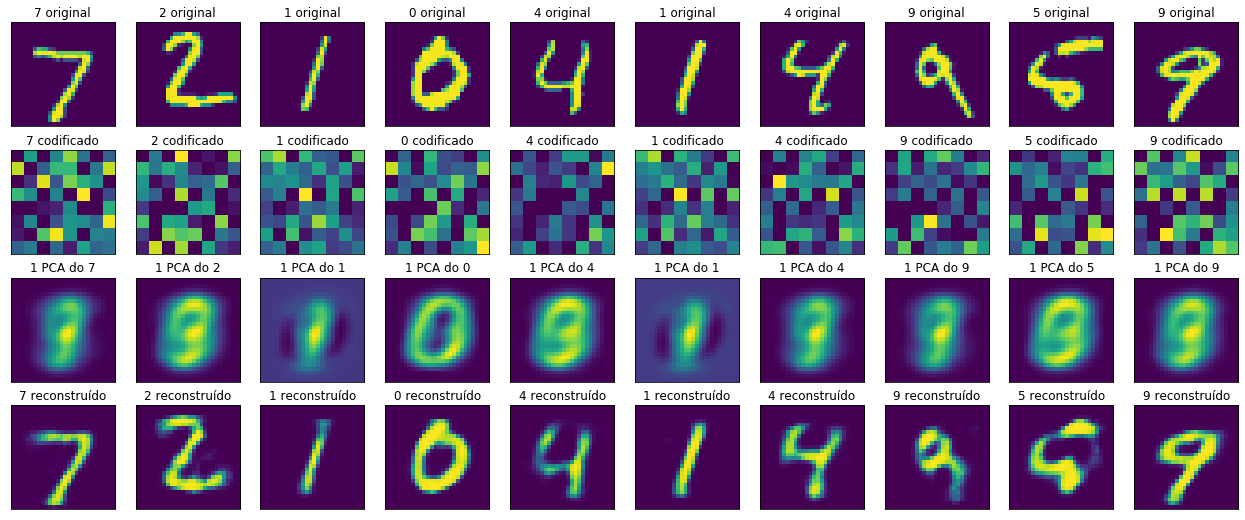

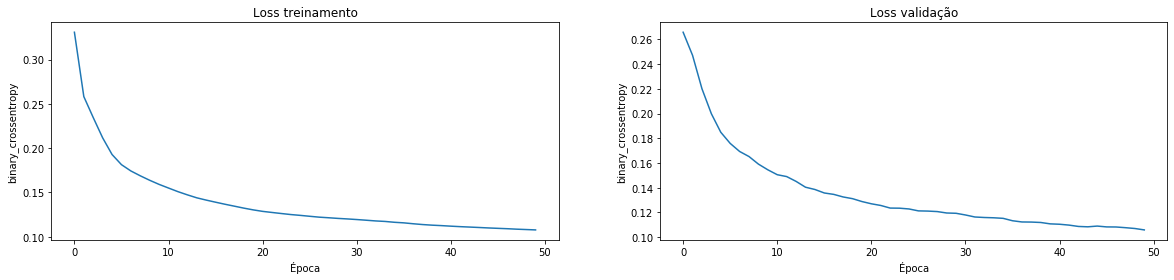

In [9]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

fig, ax = plt.subplots(4, 10, figsize=(22, 9))

for i in range(10):
    ax[0][i].imshow(X_test[i].reshape(28, 28))
    ax[0][i].set_title('%d original'%(y_test[i]))
    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)
    
    ax[1][i].imshow(encoded_imgs[i].reshape(8, 8))
    ax[1][i].set_title('%d codificado'%(y_test[i]))
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)
    
    ax[2][i].imshow(X_pca_test[i].reshape(28, 28))
    ax[2][i].set_title('1 PCA do %d'%(y_test[i]))
    ax[2][i].get_xaxis().set_visible(False)
    ax[2][i].get_yaxis().set_visible(False)

    ax[3][i].imshow(decoded_imgs[i].reshape(28, 28))
    ax[3][i].set_title('%d reconstruído'%(y_test[i]))
    ax[3][i].get_xaxis().set_visible(False)
    ax[3][i].get_yaxis().set_visible(False)

plt.savefig('results/mnist_plot_el2_dl2.pdf', dpi=100, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
loss = history.history['loss']
val_loss = history.history['val_loss']

ax[0].plot(loss)
ax[0].set_ylabel('binary_crossentropy')
ax[0].set_xlabel('Época')
ax[0].set_title('Loss treinamento')

ax[1].set_title('Loss validação')
ax[1].plot(val_loss)
ax[1].set_ylabel('binary_crossentropy')
ax[1].set_xlabel('Época')

plt.savefig('results/mnist_loss_el2_dl2.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)